In [2]:
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import operator
%matplotlib inline

In [20]:
model_name_pre = "3task_pre_0130"
model_name_onetask = "1task_0130"
model_name_threetask = "3task_0130"
num_runs = 3
test_trials = 500
iter_list_pre = np.arange(0,30000,5000)#[3200, 4800, 6400, 9600, 12800]#, 200, 300, 400, 600, 800, 1200]#, 1600, 2400, 3200, 4800, 6400, 9600, 12800, 19200, 25600, 38400, 51200, 76800, 102400]#, 153600, 204800, 307200, 409600, 614400, 819200, 1000000]
            #[0, 400, 800, 1600, 3200, 6400, 12800, 25600]#, 51200, 76800, 102400]#, 153600, 204800, 307200, 409600, 614400, 819200, 1000000, 2000000, 3000000, 4000000]
             #[0, 1000, 4000, 16000, 32000, 64000, 125000, 250000, 500000, 600000]
iter_list_onetask = np.arange(0,30000,5000)
iter_list_threetask = np.arange(0,30000,5000)
glimpse_list = np.arange(0,10,1)
max_blobs = 9
min_blobs = 1

num_iters_pre = len(iter_list_pre)
num_iters_onetask = len(iter_list_onetask)
num_iters_threetask = len(iter_list_threetask)
num_glimpses = len(glimpse_list)
blob_list = np.arange(0,10,1)
output_size = max_blobs - min_blobs + 2 # 10
data_directory_pre= "data/" + model_name_pre + "/"
data_directory_onetask= "data/" + model_name_onetask + "/"
data_directory_threetask= "data/" + model_name_threetask + "/"
m = 0.5
num_imgs = test_trials*(output_size-1)

In [16]:
#pre_count_results_hist = np.load(data_directory_pre + "count_results_hist.npy")
#pre_count_class_hist = np.load(data_directory_pre + "count_class_hist.npy")
#pre_high_cot_hist = np.load(data_directory_pre + "high_cot_hist.npy")
#pre_count_accuracy_hist = np.load(data_directory_pre + "count_accuracy_hist.npy")
#pre_point_results_hist = np.load(data_directory_pre + "point_results_hist.npy")
#pre_point_accuracy_hist = np.load(data_directory_pre + "point_accuracy_hist.npy")
#pre_error_hist = np.load(data_directory_pre + "error_hist.npy")

onetask_count_results_hist = np.load(data_directory_onetask + "count_results_hist.npy")
onetask_count_class_hist = np.load(data_directory_onetask + "count_class_hist.npy")
onetask_high_cot_hist = np.load(data_directory_onetask + "high_cot_hist.npy")
onetask_count_accuracy_hist = np.load(data_directory_onetask + "count_accuracy_hist.npy")
onetask_point_results_hist = np.load(data_directory_onetask + "point_results_hist.npy")
onetask_point_accuracy_hist = np.load(data_directory_onetask + "point_accuracy_hist.npy")
onetask_error_hist = np.load(data_directory_onetask + "error_hist.npy")

threetask_count_results_hist = np.load(data_directory_threetask + "count_results_hist.npy")
threetask_count_class_hist = np.load(data_directory_threetask + "count_class_hist.npy")
threetask_high_cot_hist = np.load(data_directory_threetask + "high_cot_hist.npy")
threetask_count_accuracy_hist = np.load(data_directory_threetask + "count_accuracy_hist.npy")
threetask_point_results_hist = np.load(data_directory_threetask + "point_results_hist.npy")
threetask_point_accuracy_hist = np.load(data_directory_threetask + "point_accuracy_hist.npy")
threetask_error_hist = np.load(data_directory_threetask + "error_hist.npy")

# Count Analysis

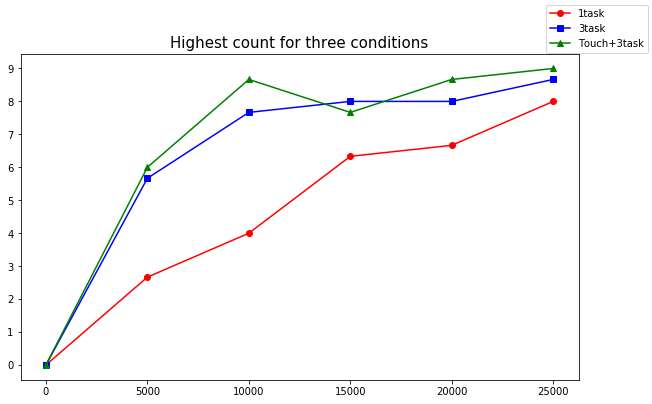

In [34]:
# Total Highest Count

fig, axs = plt.subplots(1, 1)
plt.rcParams["figure.figsize"] = [10,6]
x = np.linspace(iter_list[0], iter_list[num_iters-1], num_iters)
y1 = np.mean(onetask_high_cot_hist,axis=0)[0:6]
y2 = np.mean(threetask_high_cot_hist,axis=0)[0:6]
y3 = np.mean(pre_high_cot_hist,axis=0)[0:6]
plt.yticks([0,1,2,3,4,5,6,7,8,9,10])
l1, l2, l3 = axs.plot(x, y1, 'ro-', x, y2, 'bs-', x, y3, 'g^-')
fig.legend((l1, l2, l3), ('1task', '3task', 'Touch+3task'), 'upper right')
plot_title = "Highest count for three conditions" 
plt.title(plot_title, fontsize=15)

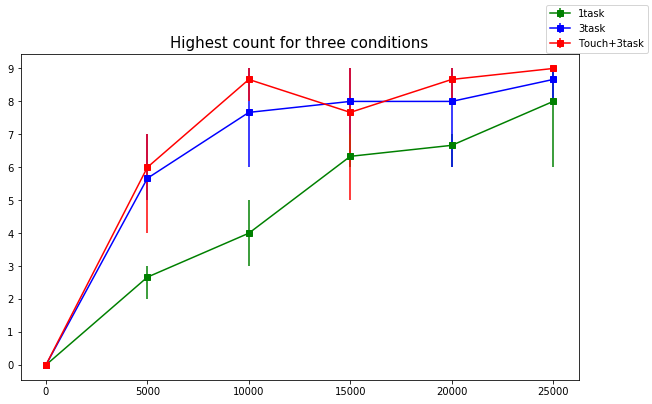

In [78]:
# Total Highest Count

fig, axs = plt.subplots(1, 1)
plt.rcParams["figure.figsize"] = [10,6]
x = np.linspace(iter_list[0], iter_list[num_iters-1], num_iters)
y1 = np.mean(onetask_high_cot_hist,axis=0)[0:6]
y2 = np.mean(threetask_high_cot_hist,axis=0)[0:6]
y3 = np.mean(pre_high_cot_hist,axis=0)[0:6]
plt.yticks([0,1,2,3,4,5,6,7,8,9,10])
lower_error_1 = y1-np.min(onetask_high_cot_hist,axis=0)[0:6]
upper_error_1 = np.max(onetask_high_cot_hist,axis=0)[0:6]-y1
asymmetric_error_1 = [lower_error_1, upper_error_1]
lower_error_2 = y2-np.min(threetask_high_cot_hist,axis=0)[0:6]
upper_error_2 = np.max(threetask_high_cot_hist,axis=0)[0:6]-y2
asymmetric_error_2 = [lower_error_2, upper_error_2]
lower_error_3 = y3-np.min(pre_high_cot_hist,axis=0)[0:6]
upper_error_3 = np.max(pre_high_cot_hist,axis=0)[0:6]-y3
asymmetric_error_3 = [lower_error_3, upper_error_3]
l1=axs.errorbar(x, y1, yerr=asymmetric_error_1, marker='s', c='green')
l2=axs.errorbar(x, y2, yerr=asymmetric_error_2, marker='s', c='blue')
l3=axs.errorbar(x, y3, yerr=asymmetric_error_3, marker='s', c='red')
fig.legend((l1, l2, l3), ('1task', '3task', 'Touch+3task'), 'upper right')
plot_title = "Highest count for three conditions" 
plt.title(plot_title, fontsize=15)

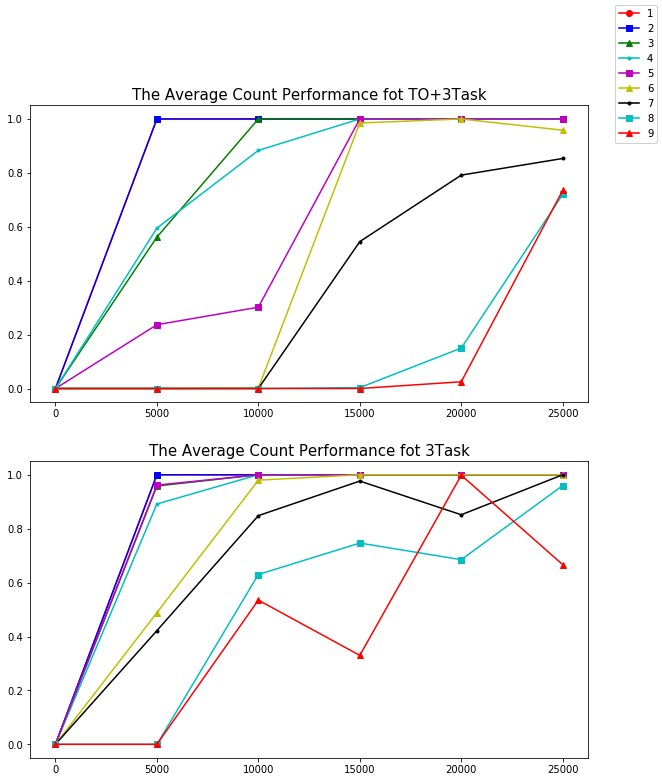

In [19]:
# Average count Accuracy
def plot_count_accuracy_avg(self1, self2, self3):
    """Plot the count accuracy."""
    fig, axs = plt.subplots(3,1)
    plt.rcParams["figure.figsize"] = [10,18]
    x_prev = np.linspace(iter_list_pre[0], iter_list_pre[num_iters_pre-1], num_iters_pre)
    self1_avg = np.mean(self1,axis=0)
    y1 = self1_avg[0][0:6]
    y2 = self1_avg[1][0:6]
    y3 = self1_avg[2][0:6]
    y4 = self1_avg[3][0:6]
    y5 = self1_avg[4][0:6]
    y6 = self1_avg[5][0:6]
    y7 = self1_avg[6][0:6]
    y8 = self1_avg[7][0:6]
    y9 = self1_avg[8][0:6]
    l1, l2, l3, l4, l5, l6, l7, l8, l9 = axs[0].plot(x_prev, y1, 'ro-', x_prev, y2, 'bs-', x_prev, y3, 'g^-', x_prev, y4, 'c.-', x_prev, y5, 'ms-', x_prev, y6, 'y^-', x_prev, y7, 'k.-', x_prev, y8, 'cs-', x_prev, y9, 'r^-')
    axs[0].set_title("The Average Count Performance fot TO+3Task", fontsize=15)
    fig.legend((l1, l2, l3, l4, l5, l6, l7, l8, l9), ('1', '2', '3', '4', '5', '6', '7', '8', '9'), 'upper right')
    #plot_title = "The Average Count Performance" 
    #plt.title(plot_title, fontsize=15)
    
    x_threetask = np.linspace(iter_list_threetask[0], iter_list_threetask[num_iters_pre-1], num_iters_threetask)
    self2_avg = np.mean(self2,axis=0)
    y1 = self2_avg[0]
    y2 = self2_avg[1]
    y3 = self2_avg[2]
    y4 = self2_avg[3]
    y5 = self2_avg[4]
    y6 = self2_avg[5]
    y7 = self2_avg[6]
    y8 = self2_avg[7]
    y9 = self2_avg[8]
    l1, l2, l3, l4, l5, l6, l7, l8, l9 = axs[1].plot(x_threetask, y1, 'ro-', x_threetask, y2, 'bs-', x_threetask, y3, 'g^-', x_threetask, y4, 'c.-', x_threetask, y5, 'ms-', x_threetask, y6, 'y^-', x_threetask, y7, 'k.-', x_threetask, y8, 'cs-', x_threetask, y9, 'r^-')
    axs[1].set_title("The Average Count Performance fot 3Task", fontsize=15)
    fig.legend((l1, l2, l3, l4, l5, l6, l7, l8, l9), ('1', '2', '3', '4', '5', '6', '7', '8', '9'), 'upper right')
    
    x_onetask = np.linspace(iter_list_onetask[0], iter_list_onetask[num_iters_pre-1], num_iters_onetask)
    self3_avg = np.mean(self3,axis=0)
    y1 = self3_avg[0]
    y2 = self3_avg[1]
    y3 = self3_avg[2]
    y4 = self3_avg[3]
    y5 = self3_avg[4]
    y6 = self3_avg[5]
    y7 = self3_avg[6]
    y8 = self3_avg[7]
    y9 = self3_avg[8]
    l1, l2, l3, l4, l5, l6, l7, l8, l9 = axs[2].plot(x_onetask, y1, 'ro-', x_onetask, y2, 'bs-', x_onetask, y3, 'g^-', x_onetask, y4, 'c.-', x_onetask, y5, 'ms-', x_onetask, y6, 'y^-', x_onetask, y7, 'k.-', x_onetask, y8, 'cs-', x_onetask, y9, 'r^-')
    axs[2].set_title("The Average Count Performance fot 1Task", fontsize=15)
    fig.legend((l1, l2, l3, l4, l5, l6, l7, l8, l9), ('1', '2', '3', '4', '5', '6', '7', '8', '9'), 'upper right')
        
plot_count_accuracy_avg(pre_count_accuracy_hist, threetask_count_accuracy_hist, onetask_count_accuracy_hist)

# Point Analysis

In [13]:
# Average point Accuracy
def plot_point_accuracy_avg(self1, self2, self3):
    """Plot the point accuracy."""
    fig, axs = plt.subplots(3,1)
    plt.rcParams["figure.figsize"] = [10,18]
    x_prev = np.linspace(iter_list_pre[0], iter_list_pre[num_iters_pre-1], num_iters_pre)
    self1_avg = np.mean(self1,axis=0)
    y1 = self1_avg[0][0:6]
    y2 = self1_avg[1][0:6]
    y3 = self1_avg[2][0:6]
    y4 = self1_avg[3][0:6]
    y5 = self1_avg[4][0:6]
    y6 = self1_avg[5][0:6]
    y7 = self1_avg[6][0:6]
    y8 = self1_avg[7][0:6]
    y9 = self1_avg[8][0:6]
    l1, l2, l3, l4, l5, l6, l7, l8, l9 = axs[0].plot(x_prev, y1, 'ro-', x_prev, y2, 'bs-', x_prev, y3, 'g^-', x_prev, y4, 'c.-', x_prev, y5, 'ms-', x_prev, y6, 'y^-', x_prev, y7, 'k.-', x_prev, y8, 'cs-', x_prev, y9, 'r^-')
    axs[0].set_title("The Average Point Performance fot TO+3Task", fontsize=15)
    fig.legend((l1, l2, l3, l4, l5, l6, l7, l8, l9), ('1', '2', '3', '4', '5', '6', '7', '8', '9'), 'upper right')
    #plot_title = "The Average Count Performance" 
    #plt.title(plot_title, fontsize=15)
    
    x_threetask = np.linspace(iter_list_threetask[0], iter_list_threetask[num_iters_pre-1], num_iters_threetask)
    self2_avg = np.mean(self2,axis=0)
    y1 = self2_avg[0]
    y2 = self2_avg[1]
    y3 = self2_avg[2]
    y4 = self2_avg[3]
    y5 = self2_avg[4]
    y6 = self2_avg[5]
    y7 = self2_avg[6]
    y8 = self2_avg[7]
    y9 = self2_avg[8]
    l1, l2, l3, l4, l5, l6, l7, l8, l9 = axs[1].plot(x_threetask, y1, 'ro-', x_threetask, y2, 'bs-', x_threetask, y3, 'g^-', x_threetask, y4, 'c.-', x_threetask, y5, 'ms-', x_threetask, y6, 'y^-', x_threetask, y7, 'k.-', x_threetask, y8, 'cs-', x_threetask, y9, 'r^-')
    axs[1].set_title("The Average Point Performance fot 3Task", fontsize=15)
    fig.legend((l1, l2, l3, l4, l5, l6, l7, l8, l9), ('1', '2', '3', '4', '5', '6', '7', '8', '9'), 'upper right')
    
    x_onetask = np.linspace(iter_list_onetask[0], iter_list_onetask[num_iters_pre-1], num_iters_onetask)
    self3_avg = np.mean(self3,axis=0)
    y1 = self3_avg[0]
    y2 = self3_avg[1]
    y3 = self3_avg[2]
    y4 = self3_avg[3]
    y5 = self3_avg[4]
    y6 = self3_avg[5]
    y7 = self3_avg[6]
    y8 = self3_avg[7]
    y9 = self3_avg[8]
    l1, l2, l3, l4, l5, l6, l7, l8, l9 = axs[2].plot(x_onetask, y1, 'ro-', x_onetask, y2, 'bs-', x_onetask, y3, 'g^-', x_onetask, y4, 'c.-', x_onetask, y5, 'ms-', x_onetask, y6, 'y^-', x_onetask, y7, 'k.-', x_onetask, y8, 'cs-', x_onetask, y9, 'r^-')
    axs[2].set_title("The Average Point Performance fot 1Task", fontsize=15)
    fig.legend((l1, l2, l3, l4, l5, l6, l7, l8, l9), ('1', '2', '3', '4', '5', '6', '7', '8', '9'), 'upper right')
        
plot_count_accuracy_avg(pre_point_accuracy_hist, threetask_point_accuracy_hist, onetask_point_accuracy_hist)

# Coding Types of Errors